<h1>Isolated Community Evacuation Problem  (ICEP) </h1>



This problem can be expressed through two research questions:
<ul>
    <li>During an emergency, how can resources be optimally routed to evacuate the entire community as quickly as possible?</li>
    <li>During evacuation planning, which resources need to be secured to prepare for quick evacuation over a variety of disaster scenarios?</li>
</ul>
The paper provides two formulations: the first is a deterministic mixed-integer programming formulation (D-ICEP).
The D-ICEP can therefore be used for response purposes and help decision makers and
emergency managers to make decisions on how to effectively allocate available recovery resources to different parts of the disaster
area and how to evacuate the affected population in the fastest possible way.


Before data generation (nodes, resources and arcs), we have to set some parameters, let's start with a simple case:
    

In [1]:
import generateSimpleData
import runExpe
import pandas as pd
from classes.plotting import Plotting
from classes.utils import Utils

num_i = 2               # Number of potential resources for evacuation purpouses
num_a = 2               # Number of areas to be evacuated
num_b = 2               # Number of pickUp points where people are loaded on rescue vehicles
num_c = 2               # Number of shelters where people are dropped off
num_h = 2               # Number of initial locations from where rescue resources depart
num_t = 1               # Number of sink node (to not be changed)
evaDemand = 60          # Number of people per area
num_selfEva = 5         # Number of self evacuees (people that can safe themselfs)
numClas = 1             # Number of classes of rescue resources

Next, we can move on by generating data:

In [2]:
data = generateSimpleData.generateSimpleData(num_i, num_a, num_h, num_b, num_c, num_selfEva, evaDemand, numClas)

So now we can plot our emergency scenario:
<ul>
    <li>Red cross and green cross are start and sink node respectively </li>
    <li>Green nodes and yellow arcs are the initial resource location and the leg trip the resource have to take to reach an evacuation area </li>
    <li>Blue nodes are evacuation areas and red dashed arcs represent population movements to pickUp points from evacuation areas</li>
    <li>Yellow nodes are pick-up points </li>
    <li>Blue arcs represent the roads used by rescuers to reach shelters (red nodes) from pick-up points and back </li>
    <li>Green dotted arcs represents people who can self evacuate the area with their own vehicles </li>
</ul>
     

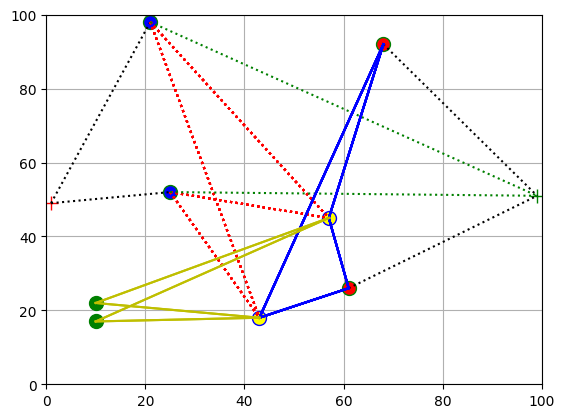

In [3]:
plotting = Plotting(data)
plotting.plotBase()
plotting.plotResourceArcs()

Now let's run our experiment and check which is the path of the i-th resource at the k-th trip

In [4]:

status, runtime, objVal, experiment = runExpe.runExpe(data)
vars = experiment.getVars()
i = 0                               # Resource 1 index (Set it differently as preferred)
k = 0                               # Trip 1 index (Set it differently as preferred)
objValue = objVal
plotting.plotBase()                 # Plot base nodes and roads
plotting.plotZetaArc(vars, i)       # Plot arcs from initial locations to pickup poiunts
plotting.plotGammaArc(vars, i, k)   # Plot arcs from pickUp to shelters
plotting.plotDeltaArc(vars, i, k)   # Plot arcs from shelters back to pickUp points
plotting.plotGammaArc(vars, i, k+1) # Plot arcs from pickUp to shelters in the succesively trip
plotting.show()

print("Solution found in ", runtime, "seconds. Total rescue time: ", objVal, "minutes")
print("Note: for arrow order follow the path from the inital location (yellow arc), then from pick-up to shelter (blue arc), then back (cyan arc), then blue again")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-16
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 385 rows, 233 columns and 823 nonzeros
Model fingerprint: 0x9171daed
Variable types: 0 continuous, 233 integer (88 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 277 rows and 82 columns
Presolve time: 0.00s
Presolved: 108 rows, 151 columns, 446 nonzeros
Variable types: 0 continuous, 151 integer (68 binary)

Root relaxation: objective 6.494925e+01, 110 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   64.94925    0   37          -   64.94925      -     - 

GurobiError: Unable to write to file 'model/mymodel.lp'

Now we can try to increase some parameters such as the number of resources, number of evacuation areas and pickup points, and also introduce vehicle type specific compatibility between resources and pick or drop points (Es. a ferry is not compatible with a parking lot).


In [ ]:
num_i = 4               # Number of potential resources for evacuation purpouses
num_a = 2               # Number of areas to be evacuated
num_b = 3               # Number of pickUp points where people are loaded on rescue vehicles
num_c = 3               # Number of shelters where people is dropped off
num_h = 2               # Number of initial locations from where rescue resources depart
num_t = 1               # Number of sink node (to not be changed)
evaDemand = 500         # Number of people per area
num_selfEva = 10        # Number of self evacuees (people that can safe themselfs)
numClas = 2             # Number of classes of rescue resources

Then as before, we regenerate data, compute experiment and show results:

In [ ]:
data = generateSimpleData.generateSimpleData(num_i, num_a, num_h, num_b, num_c, num_selfEva, evaDemand, numClas)
status, runtime, objVal, experiment = runExpe.runExpe(data)

vars = experiment.getVars()
df = pd.DataFrame(columns=['Resource total time', 'Resource class', 'Speed (Km/h)', 'Capacity', 'Total distance', 'RoundTrips'])
resTime , key = Utils.getVars(Utils, experiment.getVars(), 'timeForResourceI')
df['Resource total time'] = resTime
df['Resource class'] = [ res.clas for res in  data['resources']]
df['Speed (Km/h)'] = [res.emptySpeed * 60 for res in data['resources']]
df['Capacity'] = [res.capacity for res in data['resources']]
df['Total distance'] = [resTime[i]/data['resources'][i].emptySpeed for i in range(num_i)]
df['RoundTrips'] = [res.maxTrips for res in  data['resources']]


objValue = objVal

print("Solution found in ", runtime, "seconds. Total rescue time: ", objVal, "minutes")

df
